# Compressed Sparse Row 


## Explanation of CSR Format
 In the CSR format, a sparse matrix is stored in a compact form using three arrays:
 - `values`: Contains all the non-zero values in the matrix.
 - `columns`: Contains the column indices corresponding to each non-zero value.
 - `row_pointer`: Contains indices in the `values` array where each row starts.
 This format is efficient for matrix-vector multiplication and storage of sparse matri

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [18]:
def create_sparse_matrix(rows, cols, density=0.05):
    """Creates a sparse matrix with the given density."""
    matrix = np.random.rand(rows, cols)
    matrix[matrix > density] = 0
    return matrix

In [19]:
def matrix_to_csr(matrix):
    """Converts a dense matrix to Compressed Sparse Row (CSR) format."""
    values = []
    columns = []
    row_pointer = [0]

    for row in matrix:
        row_values = []
        row_columns = []
        for col_idx, value in enumerate(row):
            if value != 0:
                row_values.append(value)
                row_columns.append(col_idx)
        values.extend(row_values)
        columns.extend(row_columns)
        row_pointer.append(len(values))

    return np.array(values), np.array(columns), np.array(row_pointer)


In [20]:
# Function to calculate memory size of a matrix or CSR components
def calculate_memory_usage(*args):
    """Calculates total memory usage of provided arrays."""
    return sum(arr.nbytes for arr in args)


In [21]:
# Create a large sparse matrix
rows, cols = 1000, 1000
sparse_matrix = create_sparse_matrix(rows, cols)

# Convert to CSR format
values, columns, row_pointer = matrix_to_csr(sparse_matrix)

# Calculate memory usage before and after
original_memory = calculate_memory_usage(sparse_matrix)
compressed_memory = calculate_memory_usage(values, columns, row_pointer)


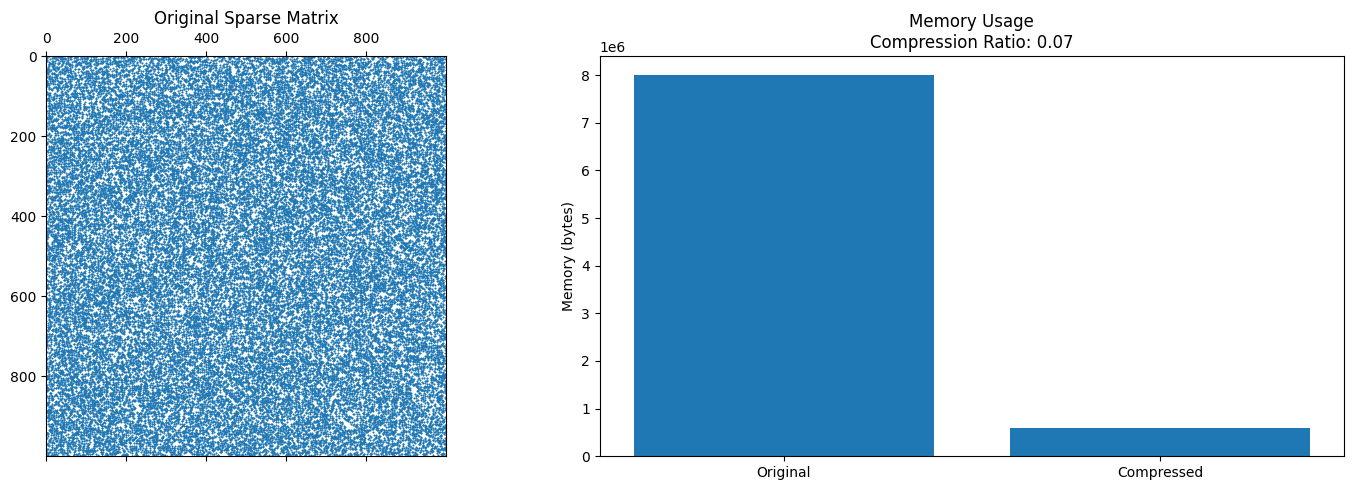

In [22]:
# Visualizing original and sparse representation
plt.figure(figsize=(15, 5))

# Original matrix visualization
plt.subplot(1, 2, 1)
plt.spy(sparse_matrix, markersize=0.5)
plt.title("Original Sparse Matrix")

# Visualizing CSR is not as straightforward, so we'll just display the size savings
plt.subplot(1, 2, 2)
compression_ratio = compressed_memory / original_memory
plt.bar(["Original", "Compressed"], [original_memory, compressed_memory])
plt.title(f"Memory Usage\nCompression Ratio: {compression_ratio:.2f}")
plt.ylabel("Memory (bytes)")

plt.tight_layout()
plt.show()


In [25]:
# Complexity Analysis
print("Time Complexity Analysis:")
print("- Conversion to CSR format: O(nnz), where nnz is the number of non-zero elements in the matrix.")
print("- Space Complexity Analysis:")
print(f"  Original matrix size: {original_memory} bytes")
print(f"  Compressed CSR size: {compressed_memory} bytes")

# Compression ratio calculation
compression_saving = original_memory / compressed_memory
percentage_reduction = (1 - (compressed_memory / original_memory)) * 100
print(f"Compression ratio (Original / Compressed): {compression_saving:.2f}")
print(f"Percentage reduction in memory usage: {percentage_reduction:.2f}%")


Time Complexity Analysis:
- Conversion to CSR format: O(nnz), where nnz is the number of non-zero elements in the matrix.
- Space Complexity Analysis:
  Original matrix size: 8000000 bytes
  Compressed CSR size: 599444 bytes
Compression ratio (Original / Compressed): 13.35
Percentage reduction in memory usage: 92.51%


### Understanding Compression Ratio

The compression ratio represents the ratio of memory used by the compressed CSR representation to the memory used by the original matrix. It is calculated as:

Compression Ratio = (Compressed Memory) / (Original Memory)


For example, if the original matrix uses 8,000,000 bytes and the compressed CSR representation uses 600,308 bytes:

Compression Ratio = 600,308 / 8,000,000 ≈ 0.08

This indicates that the compressed matrix uses approximately 8% of the original memory size, achieving significant memory savings.